# Q8. kNN Classification (sklearn)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

In [ ]:
#a pipeline with StandardScaler and KNeighborsClassifier
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

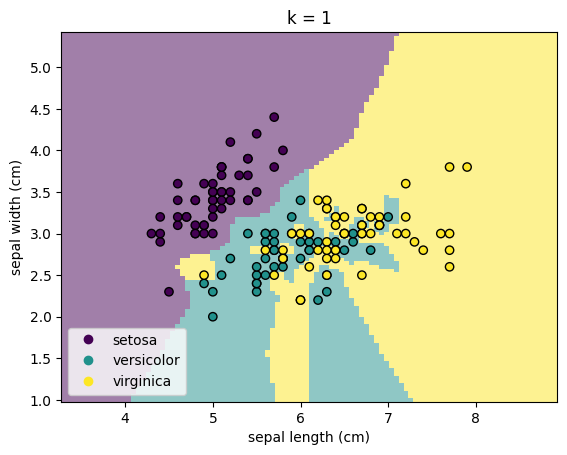

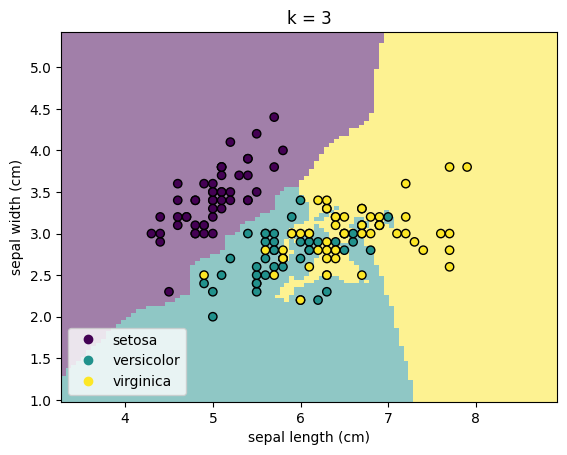

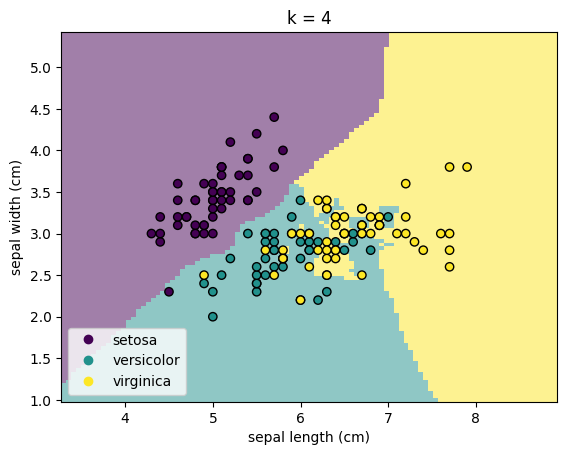

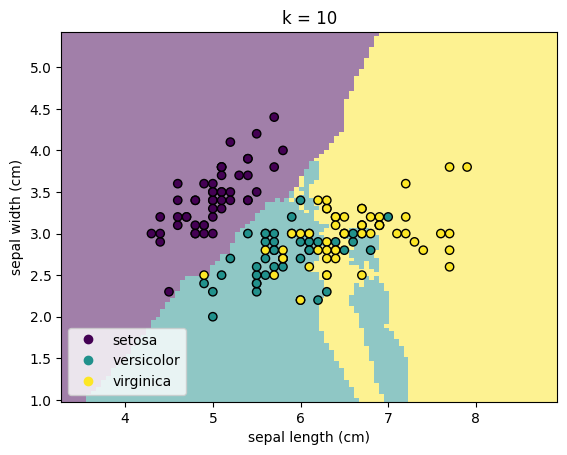

In [ ]:
k_values = [1, 3, 4, 10]
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors = k) #KNN model with number of neighbors 'k'
    clf.fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            response_method="predict",
            plot_method="pcolormesh",
            xlabel=iris.feature_names[0],
            ylabel=iris.feature_names[1],
            shading="auto",
            alpha=0.5,
        )
    
    scatter = disp.ax_.scatter(
        X.iloc[:, 0], X.iloc[:, 1],  # first two features
        c=y,                          # color of data points by class
        edgecolors="k"
    )

    # Add legend for classes
    disp.ax_.legend(
        scatter.legend_elements()[0],  # colors
        iris.target_names,             # labels
        loc="lower left"
    )

    # Title for each K
    disp.ax_.set_title(f"k = {k}")

# Comment on how the boundaries change.
When k = 1 then boundary is very irregular and sensitive to each point, which is likely to be overfitting. And if the value of k increases such as k = 3 and k = 5 then boundary becomes smoother and more stable, which creates a good balance. And if the value of k reaches to 10 i.e. k = 10 then boundary becomes smoothest and more generalized which is possible to be underfitting.